 <h1 style="text-align: center;" > Chapter 10. Planetary Rings </h1>

 <h2 style="text-align: center;" > Action by Diana C. Zapata. University of Antioquia </h2>

<p style="text-align: justify;"> In this notebook we will present part of the theoretical background of the chapter devoted to the <span style="color:blue;"><i>Planetary Ring Systems</i></span> and some mathematical and numerical results which are interested for the theory. </p>

<p style="text-align: justify;"> This chapter concentrates on those aspects of ring dynamics that illustrate resonant phenomena and can be understood using simple extensions of the methods already discussed in previous chapters of the book. Therefore it is important to realise that many of the properties of planetary ring systems can only be understood by undertaking a fluid dynamical approach to the problem. </p>

<p style="text-align: justify;"> The reader is reminded to install all libraries before importing them. </p>

In [1]:
# !pip install -q plotly

In [2]:
# !pip install -q seaborn

In [3]:
# !pip install -q tqdm

In [4]:
# !pip install -q astroquery spiceypy pandas rebound

In [5]:
# Standard library
import matplotlib.pyplot as plt
import numpy as np

# Related third party imports
import pandas as pd
from scipy.optimize import fsolve
from tqdm import tqdm

# Library specific
from astropy import constants as c
import astropy.units as u
from astroquery.jplhorizons import Horizons
import spiceypy as spy
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
import warnings
import matplotlib.cbook
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact, FloatSlider
from ipywidgets import ToggleButtons

<h2> Constants </h2>

In [6]:
au = c.au.to('km') # Astronomical units
days = 86400       # Seconds
G = c.G.value      # Gravitational constant

You can check the **id** of each body in the following table: 

        599 Jupiter

        501 Io          502 Europa      503 Ganymede    504 Callisto
        505 Amalthea    506 Himalia     507 Elara       508 Pasiphae
        509 Sinope      510 Lysithea    511 Carme       512 Ananke
        513 Leda        514 Thebe       515 Adrastea    516 Metis


        699 Saturn

        601 Mimas       602 Enceladus   603 Tethys      604 Dione
        605 Rhea        606 Titan       607 Hyperion    608 Iapetus
        609 Phoebe      610 Janus       611 Epimetheus  612 Helene
        613 Telesto     614 Calypso     615 Atlas       616 Prometheus
        617 Pandora     618 Pan         632 Methone     633 Pallene
        634 Polydeuces  635 Daphnis     649 Anthe       653 Aegaeon


        799 Uranus

        701 Ariel       702 Umbriel     703 Titania     704 Oberon
        705 Miranda     706 Cordelia    707 Ophelia     708 Bianca
        709 Cressida    710 Desdemona   711 Juliet      712 Portia
        713 Rosalind    714 Belinda     715 Puck


        899 Neptune

        801 Triton      802 Nereid      803 Naiad       804 Thalassa
        805 Despina     806 Galatea     807 Larissa     808 Proteus       
        

<h2> Data planets </h2> 

Jupiter, Saturn, Uranus, Neptune:

In [7]:
planets = ['599','699','799','899']

<h3> Radii </h3> 

In [8]:
spy.furnsh('data/pck00011.tpc')

In [9]:
radius = np.array([None]*len(planets))

for i in range (len(planets)):
    n, radius[i] = spy.bodvrd(planets[i], 'RADII', 3) 

In [10]:
jupiter_radius = radius[0].mean()
saturn_radius = radius[1].mean()
uranus_radius = radius[2].mean()
neptune_radius = radius[3].mean()

<h3> Mass (GM) </h3> 

In [11]:
spy.furnsh('data/gm_de431.tpc') 

In [12]:
masses_GM = np.array([None]*len(planets))

for i in range(len(masses_GM)):
    n = i+5
    n = str(n)
    masses_GM[i] = spy.bodvrd(n, 'GM', 1)[1]

<h3> Period </h3> 

In [13]:
T = np.array([None]*len(planets))

for i in tqdm(range(len(planets))):
    T[i] = Horizons(id=planets[i], location='@0').elements()['P'][0]*days

100%|█████████████████████████████████████████████| 4/4 [00:08<00:00,  2.08s/it]


<h2> Data satellites </h2> 

<p> Metis, Adrastea, Amalthea,Thebe: </p> 

In [14]:
jupiter_satellites = ['516', '515', '505', '514']

<p> Pan, Atlas, Prometheus, Pandora, Epimetheus, Janus, Mimas, Enceladus, Tethys: </p> 

In [15]:
saturn_satellites = ['618', '615', '616', '617', '611', '610', '601', '602', '603']

<p> Cordelia, Ophelia, Bianca, Cressida, Desdemona, Juliet, Portia, Rosalind, Belinda, Puck: </p> 

In [16]:
uranus_satellites = ['706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '705']

<p> Naiad, Thalassa, Despina, Galatea, Larissa, Proteus: </p> 

In [17]:
neptune_satellites = ['803', '804', '805', '806', '807', '808']

In [18]:
jupiter_names = ['M', 'Ad', 'Am', 'T']
saturn_names = ['Pan', 'A', 'Pr', 'Pd', 'Ep', 'J', 'M', 'E', 'T']
uranus_names = ['Co', 'O', 'Bi', 'Cr', 'D', 'J', 'Po', 'R', 'Be', 'Pu', 'M']
neptune_names = ['N', 'T', 'D', 'G', 'L', 'P']

<h3> Semi-major axis  </h3>  

In [19]:
jupiter_axes = np.array([None]*len(jupiter_satellites))
saturn_axes = np.array([None]*len(saturn_satellites))
uranus_axes = np.array([None]*len(uranus_satellites))
neptune_axes = np.array([None]*len(neptune_satellites))

In [20]:
for i in tqdm(range(len(jupiter_axes))):
    jupiter_axes[i] = Horizons(id = jupiter_satellites[i], 
                               location='@599').elements()['a'][0]*au
    
for i in tqdm(range(len(saturn_axes))):
    saturn_axes[i] = Horizons(id = saturn_satellites[i], 
                              location='@699').elements()['a'][0]*au
    
for i in tqdm(range(len(uranus_axes))):
    uranus_axes[i] = Horizons(id = uranus_satellites[i], 
                              location='@799').elements()['a'][0]*au
    
for i in tqdm(range(len(neptune_axes))):
    neptune_axes[i] = Horizons(id = neptune_satellites[i], 
                               location='@899').elements()['a'][0]*au 

100%|█████████████████████████████████████████████| 6/6 [00:07<00:00,  1.31s/it]


<h3> Radii </h3>   

In [21]:
jupiter_satellites_radius = np.array([None]*len(jupiter_satellites))
saturn_satellites_radius = np.array([None]*len(saturn_satellites))
uranus_satellites_radius = np.array([None]*len(uranus_satellites))
neptune_satellites_radius = np.array([None]*len(neptune_satellites))

In [22]:
for i in range(len(jupiter_satellites_radius)):
    jupiter_satellites_radius[i] = spy.bodvrd(jupiter_satellites[i],
                                              'RADII', 3)[1].mean()
    
for i in range(len(saturn_satellites_radius)):
    saturn_satellites_radius[i] = spy.bodvrd(saturn_satellites[i],
                                             'RADII', 3)[1].mean()
    
for i in range(len(uranus_satellites_radius)):
    uranus_satellites_radius[i] = spy.bodvrd(uranus_satellites[i],
                                             'RADII', 3)[1].mean()
    
for i in range(len(neptune_satellites_radius)):
    neptune_satellites_radius[i] = spy.bodvrd(neptune_satellites[i],
                                              'RADII', 3)[1].mean()

<h2> Data ring systems </h2> 

In [23]:
# Jupiter's ring system
halo = ['halo', 89400, 123000]
main = ['main', 123000, 128940]
gossamer = ['gossamer', 128940, 242000]

jupiter_ring_systems = pd.DataFrame([halo, main, gossamer],
                                    columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
jupiter_ring_systems 

,Ring,Inner Edge (km),Outer Edge (km)
0,halo,89400,123000
1,main,123000,128940
2,gossamer,128940,242000


In [24]:
jupiter_inner_edge = np.array(jupiter_ring_systems['Inner Edge (km)'])
jupiter_outer_edge = np.array(jupiter_ring_systems['Outer Edge (km)'])

In [25]:
# Saturn's ring system
D_ring = ['D', 66900, 74658]
C_ring = ['C', 74658, 91975]
B_ring = ['B', 91975, 117507]
A_ring = ['A', 122340, 136780]
F_ring = ['F', 140219, 140269]
G_ring = ['G', 166000, 173200]
E_ring = ['E', 180000, 480000]

saturn_ring_systems = pd.DataFrame([D_ring, C_ring, B_ring, A_ring,
                                    F_ring, G_ring, E_ring],
                                   columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
saturn_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,D,66900,74658
1,C,74658,91975
2,B,91975,117507
3,A,122340,136780
4,F,140219,140269
5,G,166000,173200
6,E,180000,480000


In [26]:
saturn_inner_edge = np.array(saturn_ring_systems['Inner Edge (km)'])
saturn_outer_edge = np.array(saturn_ring_systems['Outer Edge (km)'])

In [27]:
# Uranus's ring system
six_ring = ['6', 41837, 41852]
five_ring = ['5', 42334, 42236]
four_ring = ['4', 42571, 42573.5]
α_ring = ['α', 44718, 44725]
β_ring = ['β', 45661, 45669]
η_ring = ['η', 47176, 47177.6]
γ_ring = ['γ', 47627, 47629.5]
δ_ring = ['δ', 48300, 48305]
λ_ring = ['λ', 50024, 50026]
ε_ring = ['ε', 51149, 51265]

uranus_ring_systems = pd.DataFrame([six_ring, five_ring, four_ring,
                                    α_ring, β_ring, η_ring, γ_ring,
                                    δ_ring, λ_ring, ε_ring],
                                   columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
uranus_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,6,41837,41852.0
1,5,42334,42236.0
2,4,42571,42573.5
3,α,44718,44725.0
4,β,45661,45669.0
5,η,47176,47177.6
6,γ,47627,47629.5
7,δ,48300,48305.0
8,λ,50024,50026.0
9,ε,51149,51265.0


In [28]:
uranus_inner_edge = np.array(uranus_ring_systems['Inner Edge (km)'])
uranus_outer_edge = np.array(uranus_ring_systems['Outer Edge (km)'])

In [29]:
# Neptune's ring system
galle = ['Galle', 42000, 44000]
le_verrier = ['Le Verrier', 53200, 53299]
lassell = ['Lassell', 53200, 57200]
adams = ['Adams', 62932.57, 62947.57]

neptune_ring_systems = pd.DataFrame([galle, le_verrier, lassell,adams],
                                    columns = ['Ring', 'Inner Edge (km)', 'Outer Edge (km)'])
neptune_ring_systems

,Ring,Inner Edge (km),Outer Edge (km)
0,Galle,42000.00,44000.00
1,Le Verrier,53200.00,53299.00
2,Lassell,53200.00,57200.00
3,Adams,62932.57,62947.57


In [30]:
neptune_inner_edge = np.array(neptune_ring_systems['Inner Edge (km)'])
neptune_outer_edge = np.array(neptune_ring_systems['Outer Edge (km)'])

<h2> Section 10.2: Planetary Ring Systems </h2> 

<h3> Plot of the systems </h3> 

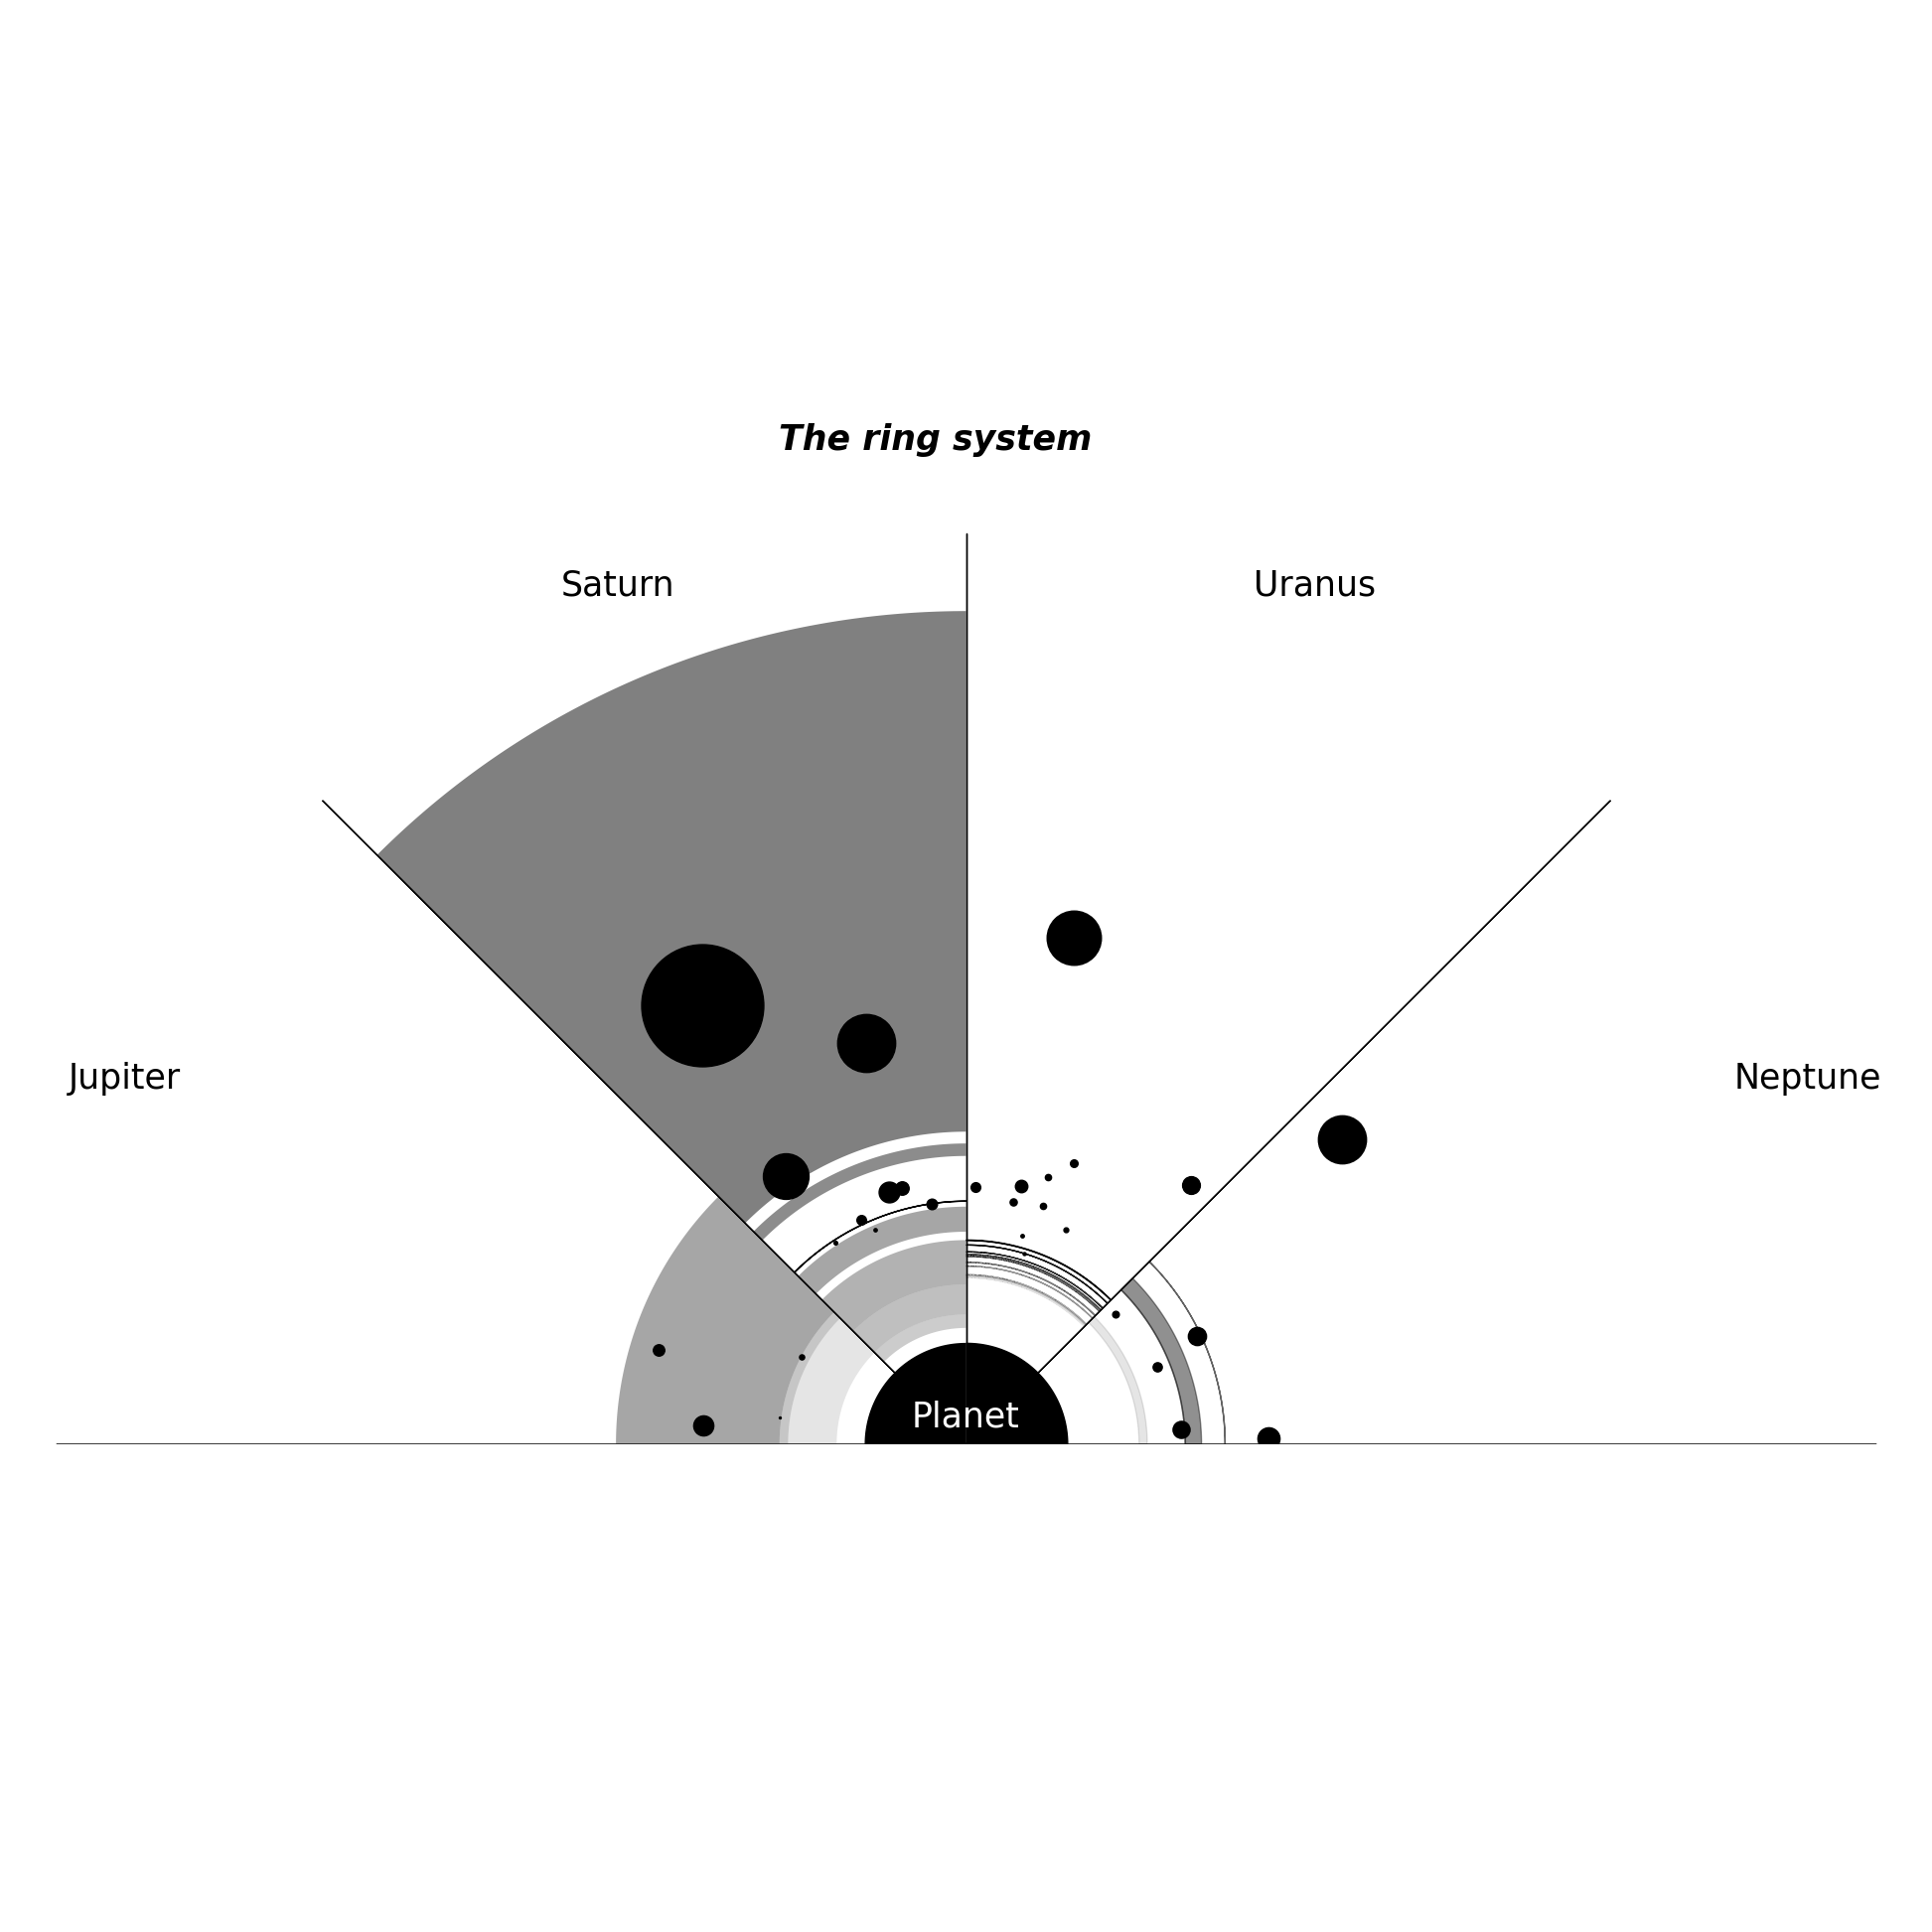

In [31]:
factor = 1
fig = plt.figure(figsize = (25*factor,25*factor))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.7, 'The ring system', fontproperties = font, fontsize = 25,
          ha='center', va='bottom')

# Plot of Jupiter
theta = np.linspace(3*np.pi/4, np.pi, 100)
r = jupiter_radius

ax.fill_between(theta, 0, jupiter_radius/r, color = 'black' )

ax.annotate('Jupiter', xy = (0, 0), xytext = (157.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black', 
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.1

for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/r, 
                    jupiter_outer_edge[i]/r, 
                    facecolor = 'black', alpha = alpha)
    alpha += 1/8
    
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 135, high = 180)*np.pi/180
    ax.plot(theta, jupiter_axes[i]/r, 'o', color = 'black',
            markersize = jupiter_satellites_radius[i]/6*factor)
    
    
    
# Plot of Saturn
theta = np.linspace(np.pi/2, 3*np.pi/4, 100)
r = saturn_radius

ax.fill_between(theta, 0, saturn_radius/r, facecolor = 'black')

ax.annotate('Saturn', xy = (0, 0), xytext = (112.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black', 
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.2

for i in range(len(saturn_inner_edge)):
    ax.fill_between(theta, saturn_inner_edge[i]/r, 
                    saturn_outer_edge[i]/r,
                    facecolor = 'black', alpha = alpha)
    alpha += 1/20
    
ax.fill_between(theta, saturn_inner_edge[4]/r,
                saturn_outer_edge[4]/r,
                color = 'black', alpha = 1)

# Plot satellites
for i in range(len(saturn_axes)):
    theta = np.random.randint(low = 90, high = 135)*np.pi/180
    ax.plot(theta, saturn_axes[i]/r, 'o', color='black',
            markersize = saturn_satellites_radius[i]/6*factor)
    
    
    
# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)
r = uranus_radius

ax.fill_between(theta, 0, uranus_radius/r, color = 'black')

ax.annotate('Uranus', xy = (0, 0), xytext = (67.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black',
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.1

for i in range(len(uranus_inner_edge)):
    ax.fill_between(theta, uranus_inner_edge[i]/r, 
                    uranus_outer_edge[i]/r, 
                    color = 'black', alpha = alpha)
    alpha += 1/10
    
# Plot satellites
for i in range(len(uranus_axes)):
    theta = np.random.randint(low = 45, high = 90)*np.pi/180
    ax.plot(theta, uranus_axes[i]/r, 'o', color='black',
            markersize = uranus_satellites_radius[i]/6*factor) 

    
    
# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)
r = neptune_radius

ax.fill_between(theta, 0, neptune_radius/r, color = 'black')

ax.annotate('Neptune', xy = (0, 0), xytext = (22.5*np.pi/180, 9),
            ha = 'center', va = 'bottom', color = 'black',
            fontsize = 25, textcoords = 'data')

# Ring system
alpha = 0.1

for i in range(len(neptune_inner_edge)):
    ax.fill_between(theta, neptune_inner_edge[i]/r,
                    neptune_outer_edge[i]/r,
                    color = 'black', alpha = alpha)
    alpha += 1/6
    
# Plot satellites
for i in range(len(neptune_axes)):
    theta = np.random.randint(low = 0, high = 45)*np.pi/180
    ax.plot(theta, neptune_axes[i]/r, 'o', color='black',
            markersize = neptune_satellites_radius[i]/6*factor)
    
    
    
for i in [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]:
    r = np.linspace(0, 9)
    ax.fill_between(i, r, color = 'black') 
  
ax.annotate('Planet', xy = (0,0), xytext = (np.pi/2, 0.1),
            ha = 'center', va = 'bottom', color = 'white',
            fontsize = 25, textcoords = 'data')


ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

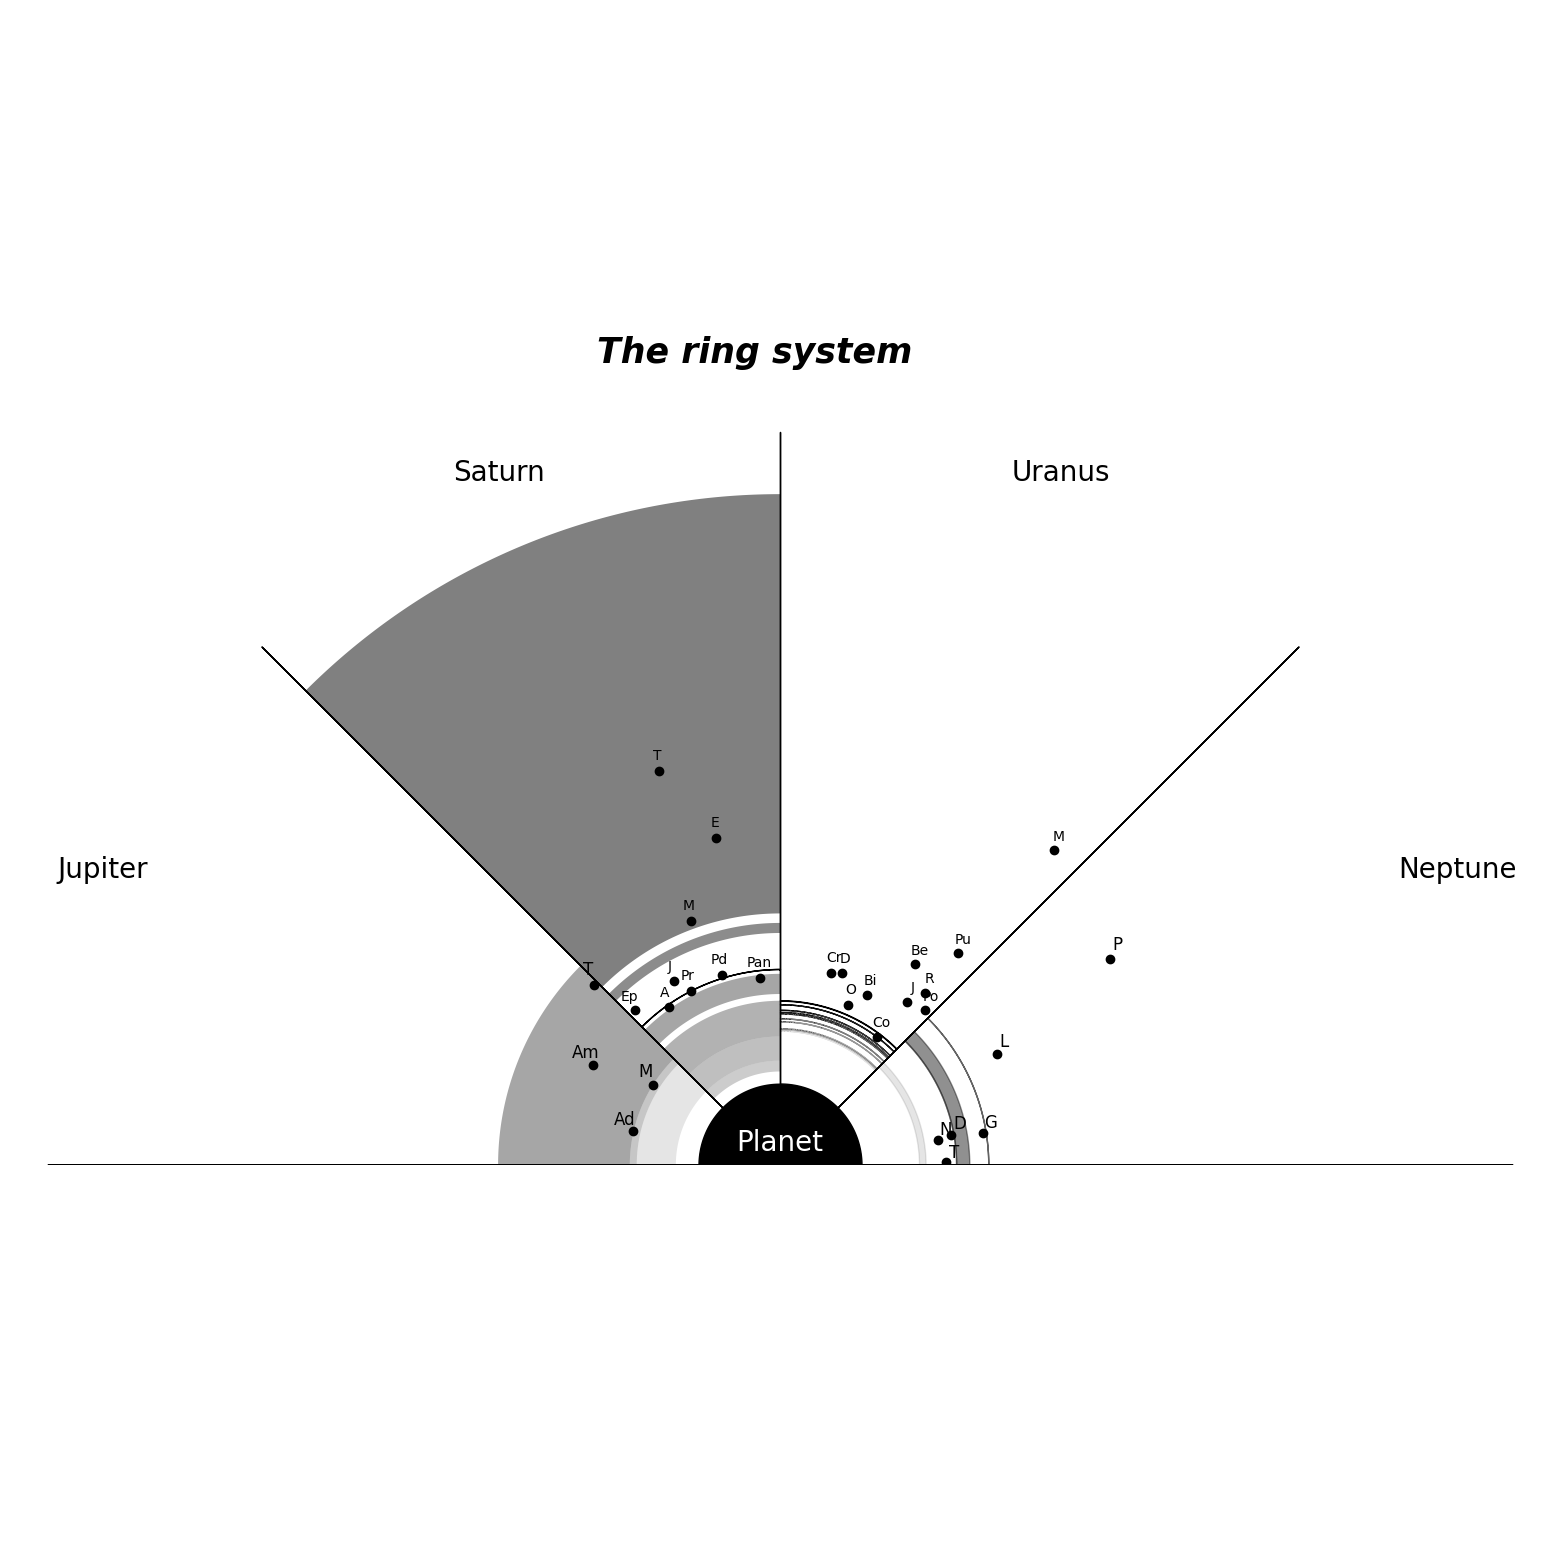

In [32]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.7, 'The ring system', fontproperties = font, fontsize = 25,
          ha='center', va='bottom')

# Plot of Jupiter
theta = np.linspace(3 * np.pi/4,np.pi, 100)

ax.fill_between(theta, 0, jupiter_radius/jupiter_radius, color = 'black' )

ax.annotate('Jupiter', xy=(0,0), xytext=(157.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')


# Ring system
alpha = 0.1
for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/jupiter_radius, 
                    jupiter_outer_edge[i]/jupiter_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/8
    
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 135, high = 180)*np.pi/180
    ax.plot(theta,jupiter_axes[i]/jupiter_radius,"o",color='black', markersize=6)
    ax.annotate(jupiter_names[i], xy=(0,0), xytext=(theta,(jupiter_axes[i].value/jupiter_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
    
    
# Plot of Saturn
theta = np.linspace(np.pi/2, 3 * np.pi/4, 100)

ax.fill_between(theta, 0, saturn_radius/saturn_radius, facecolor = 'black')

ax.annotate('Saturn', xy=(0,0), xytext=(112.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.2
for i in range(len(saturn_inner_edge)):
    ax.fill_between(theta, saturn_inner_edge[i]/saturn_radius, 
                    saturn_outer_edge[i]/saturn_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/20
    
ax.fill_between(theta, saturn_inner_edge[4]/saturn_radius, 
                    saturn_outer_edge[4]/saturn_radius, color = 'black', alpha = 1)

# Plot satellites
for i in range(len(saturn_axes)):
    theta = np.random.randint(low = 90, high = 135)*np.pi/180
    ax.plot(theta,saturn_axes[i]/saturn_radius,"o",color='black', markersize=6)
    ax.annotate(saturn_names[i], xy=(0,0), xytext=(theta,(saturn_axes[i].value/saturn_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 10,
                textcoords='data')
    
    
    
# Plot of Uranus
theta = np.linspace(np.pi/2, np.pi/4, 100)

ax.fill_between(theta, 0, uranus_radius/uranus_radius, color = 'black')

ax.annotate('Uranus', xy=(0,0), xytext=(67.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.1
for i in range(len(uranus_inner_edge)):
    ax.fill_between(theta, uranus_inner_edge[i]/uranus_radius, 
                    uranus_outer_edge[i]/uranus_radius, color = 'black', alpha = alpha)
    alpha += 1/10
    
# Plot satellites
for i in range(len(uranus_axes)):
    theta = np.random.randint(low = 45, high = 90)*np.pi/180
    ax.plot(theta,uranus_axes[i]/uranus_radius,"o",color='black', markersize=6)
    ax.annotate(uranus_names[i], xy=(0,0), xytext=(theta,(uranus_axes[i].value/uranus_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 10,
                textcoords='data')

    
    
# Plot of Neptune
theta = np.linspace(0, np.pi/4, 100)

ax.fill_between(theta, 0, neptune_radius/neptune_radius, color = 'black')

ax.annotate('Neptune', xy=(0,0), xytext=(22.5*np.pi/180,9), ha='center', va='bottom',
            color = 'black', fontsize = 20,
            textcoords='data')

# Ring system
alpha = 0.1
for i in range(len(neptune_inner_edge)):
    ax.fill_between(theta, neptune_inner_edge[i]/neptune_radius, 
                    neptune_outer_edge[i]/neptune_radius, color = 'black', alpha = alpha)
    alpha += 1/6
    
# Plot satellites
for i in range(len(neptune_axes)):
    theta = np.random.randint(low = 0, high = 45)*np.pi/180
    ax.plot(theta,neptune_axes[i]/neptune_radius,"o",color='black', markersize=6)    
    ax.annotate(neptune_names[i], xy=(0,0), xytext=(theta,(neptune_axes[i].value/neptune_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')
    
    
    
for i in [0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi]:
    r = np.linspace(0,9)
    ax.fill_between(i, r, color = 'black') 
    
ax.annotate('Planet', xy=(0,0), xytext=(np.pi/2,0.1), ha='center', va='bottom', color = 'white', fontsize = 20,
            textcoords='data')
              
ax.set_thetamin(0)
ax.set_thetamax(180)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

 <h3> Section 10.2.1: The Rings of Jupiter </h3> 

<img src="images/Ring_system_of_Jupiter.png" width="1000" />

<h3> Lorentz Resonances </h3>  

<p> The Lorentz force experienced by a charged dust grain could help explain some of the structure of the jovian ring system. In particular, commensurate relationships between the orbital period of the grain and the period of the electromagnetic force give rise to the so-called Lorentz resonances.   

In the context of celestial bodies, Lorentz resonances can occur when, for example, a planet's magnetic field interacts with charged particles in the medium.   
Lorentz resonances occur at semi-major axes given by:  


$$a_k = \Big(\frac{k\mp 1}{k}\Big)^{2/3}r_s$$  


Where $r_s$ is the synchronous orbital radius, which, in the case of Jupiter is $2.2444R_♃$ if the effects of the higher-order gravitational moments are included. (Burns et al. 1985) </p>  


In [33]:
rs = 2.2444*jupiter_radius

In [34]:
ak_int = np.array([None]*20)
ak_ext = np.array([None]*20)

for i in range(len(ak_int)):
    k = i+1
    ak_int[i] = ((k-1)/k)**(2/3) * rs
    
    k = -k
    ak_ext[i] = ((k-1)/k)**(2/3) * rs

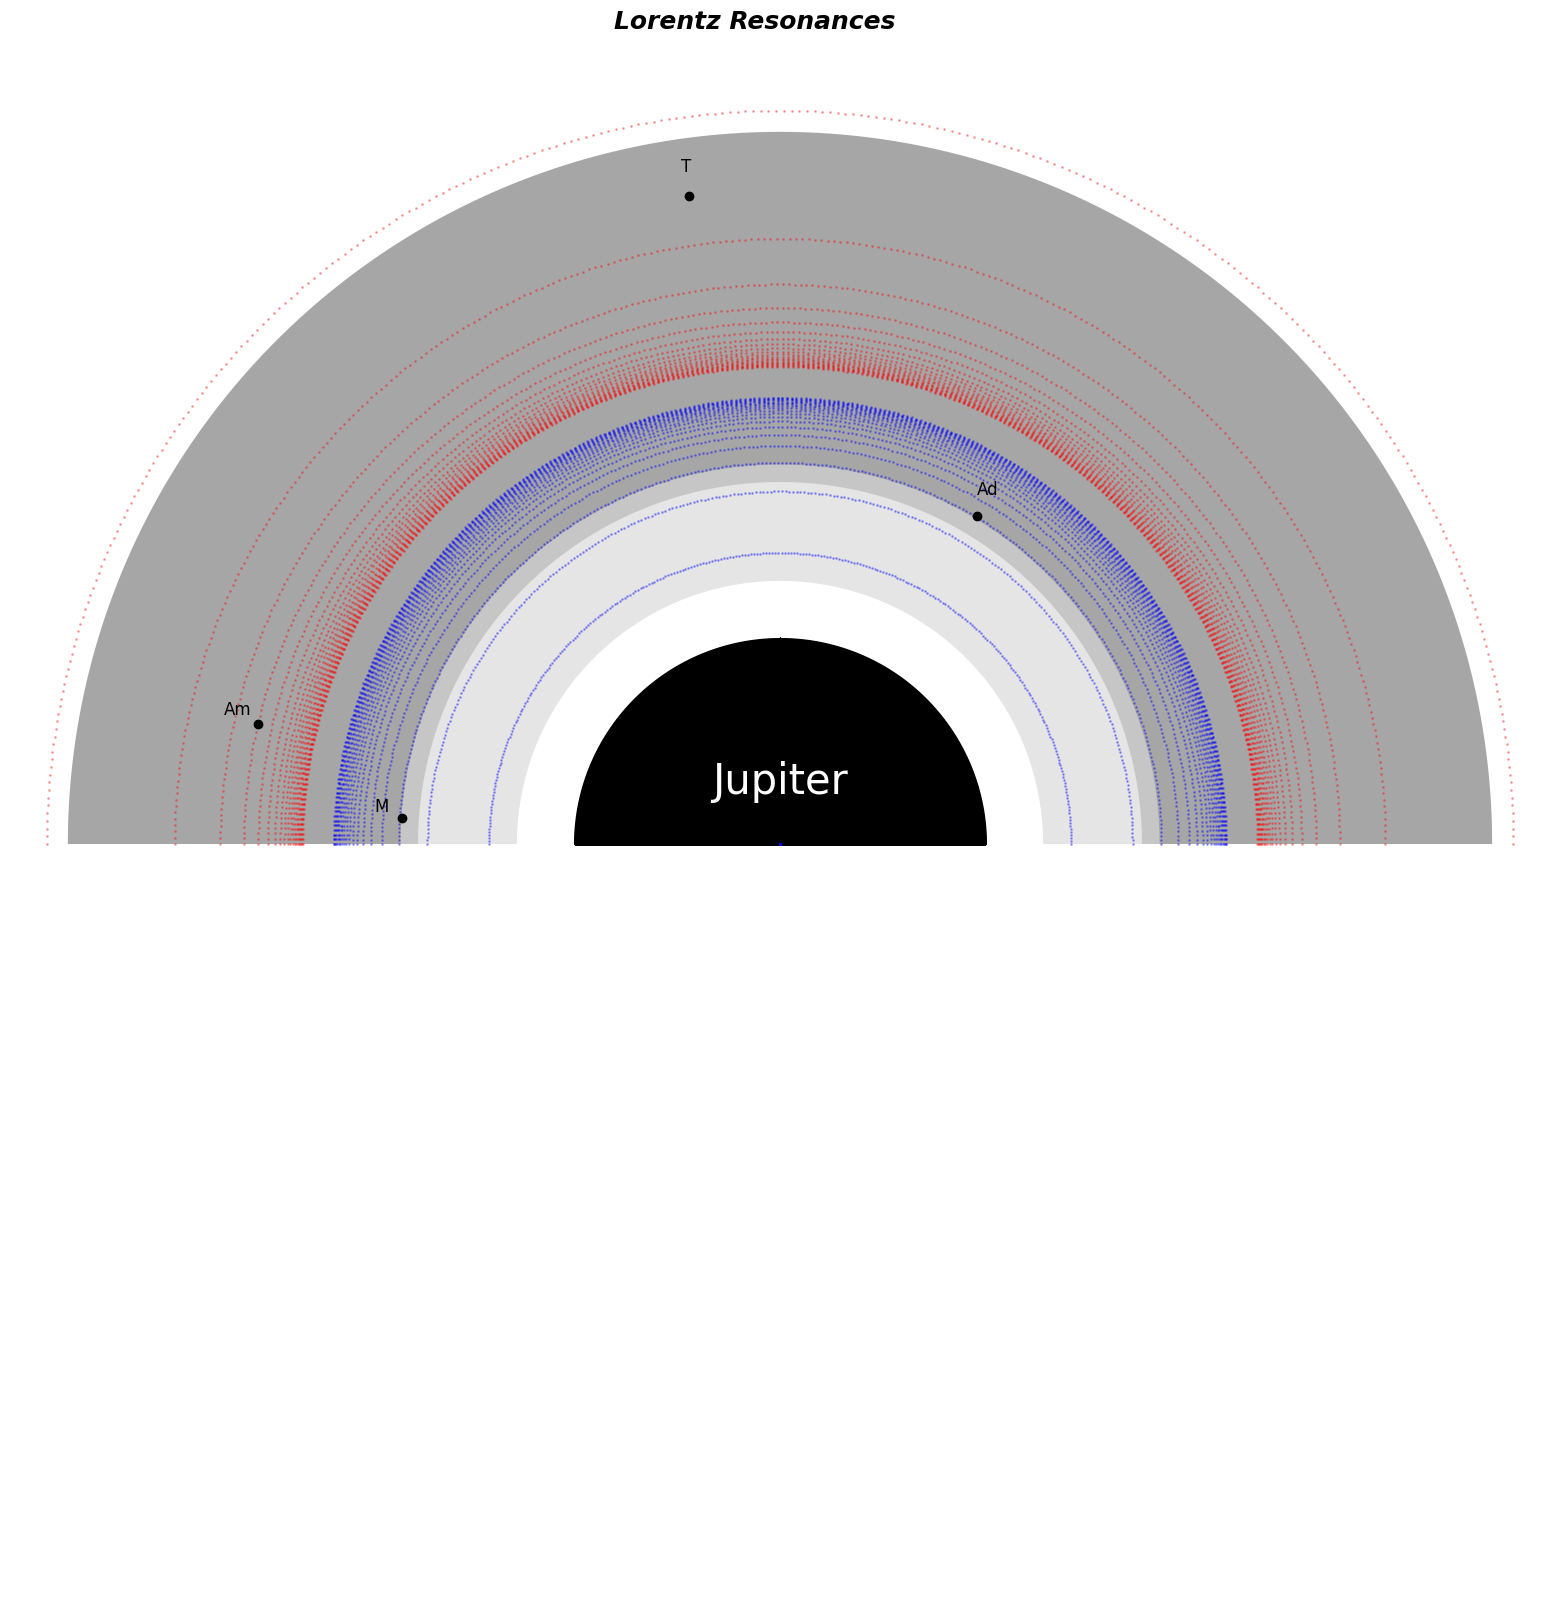

In [35]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar = True)

font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.5, 0.9, 'Lorentz Resonances', fontproperties = font, fontsize = 18,
          ha='center', va='bottom')

ax.annotate('Jupiter', xy=(0,0), xytext=(np.pi/2,0.2), ha='center', va='bottom', color = 'white', fontsize = 30,
            textcoords='data')

# Plot of Jupiter
theta = np.linspace(0, np.pi, 300)

ax.fill_between(theta, 0, jupiter_radius/jupiter_radius, color = 'black' )

# Ring system
alpha = 0.1
for i in range(len(jupiter_inner_edge)):
    ax.fill_between(theta, jupiter_inner_edge[i]/jupiter_radius, 
                    jupiter_outer_edge[i]/jupiter_radius, facecolor = 'black', alpha = alpha)
    alpha += 1/8
  

# Plot Lorentz resonance
for i in range (len(theta)):
    for j in range(len(ak_int)):
        ax.plot(theta[i],ak_int[j]/jupiter_radius, 'o', color = 'blue', 
                alpha = 0.3, markersize = 1)
        ax.plot(theta[i],ak_ext[j]/jupiter_radius, 'o', color = 'red', 
                alpha = 0.3, markersize = 1)
               
# Plot satellites
for i in range(len(jupiter_axes)):
    theta = np.random.randint(low = 0, high = 180)*np.pi/180
    ax.plot(theta,jupiter_axes[i]/jupiter_radius,"o",color='black', markersize=6)
    ax.annotate(jupiter_names[i], xy=(0,0), xytext=(theta,(jupiter_axes[i].value/jupiter_radius)+0.1),
                ha='center', va='bottom', color = 'black', fontsize = 12,
                textcoords='data')


ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')

plt.show()

<p> In the graph above you can see what we call the interior Lorentz resonances (blue), and the exterior Lorentz resonances (red).  

Lorentz resonances may be important in explaining the shape of Jupiter's rings because they alter the distribution of mass in the rings and their structure.  
Thus, the main ring seems to be bounded by the Lorentz resonances $k=2$ and $k=3$   

Likewise, the gossamer ring begins to disappear near the Lorentz resonance $k=-1$. Perhaps the outward-evolving particles scatter vertically when approach this resonance, making the already diffuse ring indistinguishable from the background. </p>  

<p> Lorentz resonances are much less important for Saturn's rings than for those of Jupiter because strengths are substantially lower. Saturn's magnetic field is weaker as well as more regular than Jupiter's. In addition, saturnian ring particles are usually much larger and charges smalle so that charge-to-mass ratios are low. Furthermore, in the main ring system, optical depths are high so that our calculations, which ignore collisions, are moot.  </p>  

<h2> Section 10.3: Resonances in Rings</h2>   

<p> The close proximity of rings and satellites in each system suggests that there could be significant mutual gravitational perturbations. In the case of Saturn’s rings, for example, virtually all the structure in the A ring can be understood in the context of resonances between ring particles and the satellites that orbit nearby. There are also resonant features in other ring systems. Therefore it is important to examine the nature of these resonant interactions in order to understand the observed features. 

Planetary rings exhibit a long list of characteristics: the position near the planets’ Roche zone, thickness and brightness variations, gaps, sharp edges, waves, wakes, spokes, clumps, arcs, and kinks. Through gravitational resonances, satellites are thought to be responsible for many of these structural features (Brahic and Ferrari, 1992). Resonances occur where the period of the particle’s orbit is in the ratio of small integers to the period of the satellite. To understand the characteristics and the effects of these resonances, it is necessary to identify all the frequencies involved with the moons’ motion.  

Satellites revolve oblate planets in elliptical orbits (with the eccentricity of these ellipses being usually very small); three frequencies arise from this sort of motion: </p> 

$$n ^2 = \frac{Gm_p}{a^3}\Big[1+\frac{3}{2}J_2\Big(\frac{R_p}{a}\Big)^2-\frac{15}{8}J_4\Big(\frac{R_p}{a}\Big)^4\Big] \ \ \ \text{Mean motion}$$    

$$\kappa ^2 = \frac{Gm_p}{a^3}\Big[1-\frac{3}{2}J_2\Big(\frac{R_p}{a}\Big)^2+\frac{45}{8}J_4\Big(\frac{R_p}{a}\Big)^4\Big] \ \ \ \text{Epicyclic frequency} $$    

$$\nu ^2 = \frac{Gm_p}{a^3}\Big[1+\frac{9}{2}J_2\Big(\frac{R_p}{a}\Big)^2-\frac{75}{8}J_4\Big(\frac{R_p}{a}\Big)^4\Big] \ \ \ \text{Vertical frequency}$$

<div style="border: 4px solid black; padding: 20px;">   
    
<h4 style="text-align: center;"> Gravitational moments $J_2$ and $J_4$:</h4>   
  
<p> The gravitational moments of a planet are a series of numerical coefficients that tell us how mass is distributed on the planet and how that mass affects gravity in different parts of the planet.

<ul>
    
<li> Moment of gravitational order zero $(J_2)$: This coefficient describes the general shape of the celestial object and its flattening at the poles. It refers to the deviation of the planet's shape from a perfect sphere. A high value of $J_2$ indicates that the object is more flattened at the poles and wider at the equator.</li>
<li> Moment of gravitational second order $(J_4)$: This coefficient describes the distribution of mass of the celestial object in terms of its density. The value of $J_4$ is related to how mass is distributed around the planet's poles.</li>
    
</ul> 

</p>

<img src="images/gravity_moments.png" width="600" />

</div>

In [36]:
data_jupiter = ['Jupiter', 14696.5, -586.6]
data_saturn = ['Saturn', 16290.6, -935.1]
data_uranus = ['Uranus', 3510.7, -34.2]
data_neptune = ['Neptune', 3536.3, -36]

gravitational_moment = pd.DataFrame([data_jupiter, data_saturn, data_uranus, data_neptune],
                                    columns = ['Ring system', 'J₂ ( x10⁻⁶ )','J₄ ( x10⁻⁶ )'])

In [37]:
gravitational_moment

,Ring system,J₂ ( x10⁻⁶ ),J₄ ( x10⁻⁶ )
0,Jupiter,14696.5,-586.6
1,Saturn,16290.6,-935.1
2,Uranus,3510.7,-34.2
3,Neptune,3536.3,-36.0


<p> The previous data was extracted from: <a href="https://ssd.jpl.nasa.gov/tools/gravity.html#/outerplanets">https://ssd.jpl.nasa.gov/tools/gravity.html#/outerplanets</a>.</p>

<h4> Pattern speed $(\Omega_p)$ :</h4>   

<p> Now consider the gravitational effect of a perturbing satellite. The satellite will have its own set of frequencies $n'$, $k'$ y $v'$.  
    
When a satellite is disturbing a particle in the ring system, the perturbation caused by the satellite is oscillatory, and the perturbing function can be written as a very complex Fourier series:
</p>


\begin{equation*}
\begin{aligned}
\mathcal{R}_{\mathrm{D}}= & \,\left(\frac{1}{2} b_{\frac{1}{2}}^{(j)}+\frac{1}{8}\left(e^2+e^{\prime 2}\right)\left[-4 j^2+2 \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j)}\right. \\
& \left.+\frac{1}{4}\left(s^2+s^{\prime 2}\right)\left([-\alpha] b_{\frac{3}{2}}^{(j-1)}+[-\alpha] b_{\frac{3}{2}}^{(j+1)}\right)\right) \\
& \times \cos \left[j \lambda^{\prime}-j \lambda\right] \\
+ & \left(\frac{1}{4} e e^{\prime}\left[2+6 j+4 j^2-2 \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j+1)}\right) \\
& \times \cos \left[j \lambda^{\prime}-j \lambda+\varpi^{\prime}-\varpi\right] \\
+ & \left(s s^{\prime}[\alpha] b_{\frac{3}{2}}^{(j+1)}\right) \cos \left[j \lambda^{\prime}-j \lambda+\Omega^{\prime}-\Omega\right] \\
+ & \left(\frac{1}{2} e[-2 j-\alpha D] b_{\frac{1}{2}}^{(j)}\right) \cos \left[j \lambda^{\prime}+(1-j) \lambda-\varpi\right] \\
+ & \left(\frac{1}{2} e^{\prime}[-1+2 j+\alpha D] b_{\frac{1}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(1-j) \lambda-\varpi^{\prime}\right] \\
+ & \left(\frac{1}{8} e^2\left[-5 j+4 j^2-2 \alpha D+4 j \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \varpi\right] \\
+ & \left(\frac{1}{4} e e^{\prime}\left[-2+6 j-4 j^2+2 \alpha D-4 j \alpha D-\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j-1)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-\varpi^{\prime}-\varpi\right] \\
+ & \left(\frac{1}{8} e^{\prime 2}\left[2-7 j+4 j^2-2 \alpha D+4 j \alpha D+\alpha^2 D^2\right] b_{\frac{1}{2}}^{(j-2)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \varpi^{\prime}\right] \\
+ & \left(\frac{1}{2} s^2[\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \\
& \times \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \Omega\right] \\
+ & \left(s s^{\prime}[-\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(2-j) \lambda-\Omega^{\prime}-\Omega\right] \\
+ & \left(\frac{1}{2} s^{\prime 2}[\alpha] b_{\frac{3}{2}}^{(j-1)}\right) \cos \left[j \lambda^{\prime}+(2-j) \lambda-2 \Omega^{\prime}\right]
\end{aligned}
\end{equation*}

<p>For each term in this series, it is possible to find a frequency at which the term becomes constant, and this is what we refer to as the <strong>pattern speed</strong>.  

This will depend on the exact combination of frequencies under consideration and may be written as:
    
$$m\Omega_p = mn' + k\kappa' + p\nu'$$   

</p>    

Where $m$, $k$, and $p$ are integers with $m$ non-negative. Thus, the pattern speed can take infinitely many values, as shown in the following interactive graph.

In [38]:
def resonance(a,mp,Rp,J2,J4,M,K,P):
    
    n = np.sqrt((G*mp/a**3)*(1 + 1.5*J2*(Rp/a)**2 - 1.875*J4*(Rp/a)**4))
    k = np.sqrt((G*mp/a**3)*(1 - 1.5*J2*(Rp/a)**2 + 5.625*J4*(Rp/a)**4))
    v = np.sqrt((G*mp/a**3)*(1 + 4.5*J2*(Rp/a)**2 - 9.375*J4*(Rp/a)**4))
    
    return (M*n + K*k + P*v)/M

In [39]:
def interactive_plot(M, K, P, mp_value):
    
    mp = mp_value
    
    J2 = np.array(gravitational_moment['J₂ ( x10⁻⁶ )'])*1e-6
    J4 = np.array(gravitational_moment['J₄ ( x10⁻⁶ )'])*1e-6
    
    if mp == masses_GM[0]*1e9/G:
        a = np.linspace(jupiter_inner_edge[0]*1e3,jupiter_outer_edge[-1]*1e3)
        Rp = jupiter_radius*1e3
        J2 = J2[0]
        J4 = J4[0]
        plt.xlabel('R♃')
        plt.ylim(0,0.009)
        
    elif mp == masses_GM[1]*1e9/G:
        a = np.linspace(saturn_inner_edge[0]*1e3,saturn_outer_edge[-1]*1e3)
        Rp = saturn_radius*1e3
        J2 = J2[1]
        J4 = J4[1]
        plt.xlabel('R♄')
        plt.ylim(0,0.008)
        
    elif mp == masses_GM[2]*1e9/G:
        a = np.linspace(uranus_inner_edge[0]*1e3,uranus_outer_edge[-1]*1e3)
        Rp = uranus_radius*1e3
        J2 = J2[2]
        J4 = J4[2]
        plt.xlabel('R♅')
        plt.ylim(0,0.006)
        
    elif mp == masses_GM[3]*1e9/G:
        a = np.linspace(neptune_inner_edge[0]*1e3,neptune_outer_edge[-1]*1e3)
        Rp = neptune_radius*1e3
        J2 = J2[3]
        J4 = J4[3]
        plt.xlabel('R♆')
        plt.ylim(0,0.0065)
        
    v = resonance(a,mp,Rp,J2,J4,M,K,P)
    
    plt.plot(a/Rp, v, color = 'purple')
    plt.title("$\Omega_P$ (1/s)")
    plt.show()

In [40]:
mp_options = [('Jupiter', masses_GM[0]*1e9/G), 
              ('Saturn', masses_GM[1]*1e9/G), 
              ('Uranus', masses_GM[2]*1e9/G), 
              ('Neptune', masses_GM[3]*1e9/G)]

In [41]:
widget_M = FloatSlider(value=1, min=1, max=10, step=1, description='$m$')
widget_K = FloatSlider(value=1, min=0, max=10, step=1, description='$k$')
widget_P = FloatSlider(value=1, min=0, max=10, step=1, description='$p$')
widget_mp = ToggleButtons(options=mp_options, description=' ', button_style='info')
#widget_mp = ToggleButtons(options=mp_options, button_style='info',tooltips=['Planeta Júpiter', 'Planeta Saturno', 'Planeta Urano', 'Planeta Neptuno'])

In [42]:
interact(interactive_plot, M=widget_M, K=widget_K, P=widget_P, mp_value=widget_mp)

interactive(children=(FloatSlider(value=1.0, description='$m$', max=10.0, min=1.0, step=1.0), FloatSlider(valu…

<function __main__.interactive_plot(M, K, P, mp_value)>

<h3> Section 10.3.1: Perturbations in Semi-major Axis and Corotation Resonances </h3>    

<p>
There is a $\Omega_p$  that produces the maximum disturbance of the satellite over the particles of the ring:

$$m(n-\Omega_p)=0$$  
   
</p>

<p> Now let's take an example:
$$m = 2, k = 1, p = 0$$

</p>

<p> The term of the perturbing function that becomes stationary is the one with:  
    
$$j = m + k + p = 2+1+0 =  3$$ 
    
This is called the 3:2 corotation resonance.
    
</p>

In [67]:
def r(a, e, t):
    return a*(1 - e**2)/(1 + e*np.cos(t))

In [68]:
def ksolve(ma, e):
    def f(ea, ma):
        return ea - e*np.sin(ea) - ma 
    ea_guess = ma
    ea_sol = fsolve(f, ea_guess, args=(ma,))
    return ea_sol[0]

In [69]:
def position(ma, a, e):
    ea = ksolve(ma, e)
    x = a*(np.cos(ea) - e)
    y = a*np.sqrt(1 - e**2)*np.sin(ea)
    return (x, y)

In [70]:
rotlist = []
p = 3/2
a = 1
e = 0.25

In [71]:
for t in np.arange(0, 4*np.pi, np.pi/20):
    posvec = position(t, a, e)
    f = np.arctan2(posvec[1], posvec[0])
    rad = np.sqrt(posvec[0]**2 + posvec[1]**2)
    th = p*t
    psi = th - f
    blip = [rad*np.cos(psi), rad*np.sin(psi)]
    rotlist.append(blip)

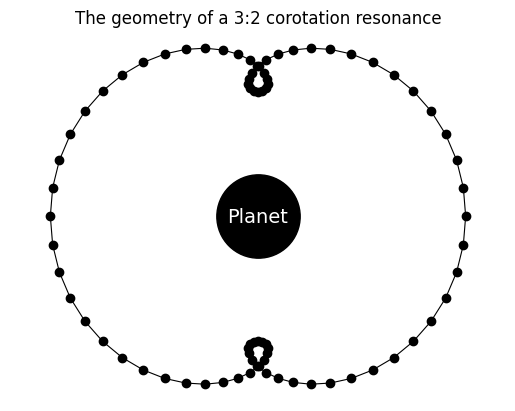

In [76]:
plt.plot([x[1] for x in rotlist], [x[0] for x in rotlist],  color = 'black', linewidth = 0.8)
plt.plot([x[1] for x in rotlist], [x[0] for x in rotlist], "o", color = 'black')

plt.plot(0,0, 'o', color = 'black', markersize = 60)
plt.annotate('Planet', xy=(0,0), xytext=(0,0), ha='center', va='center', color = 'white', fontsize = 14,
            textcoords='data')
plt.title('The geometry of a 3:2 corotation resonance')
plt.axis('equal')
plt.axis('off')
plt.show()

<h4> A example with Seaborn: </h4>    

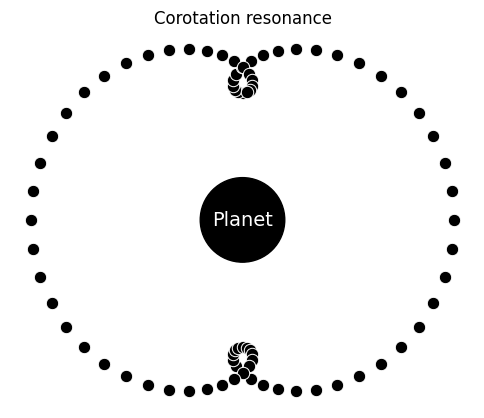

In [51]:
import seaborn as sns


x = [x[1] for x in rotlist]
y = [x[0] for x in rotlist]

fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(x=x, y=y, color='black', s=80, ax=ax)

ax.add_patch(plt.Circle((0,0), radius=0.25, color='black'))

ax.set_title("Corotation resonance")
ax.text(0, 0, 'Planet', ha='center', va='center', fontsize=14, color='white')

ax.set_aspect('equal')
ax.axis('off')

plt.show()


<h3> Section 10.3.2: Perturbations in Eccentricity and Lindblad Resonances </h3>     

<p> Other important resonances are the Lindblad resonances, which are those where the pattern speed is equal to the radial frequency of the particle. 

$$m(n-\Omega_p)= \pm \kappa$$  

Where the upper and lower signs correspond to the inner (ILR) and outer (OLR) Lindblad resonance respectively. The use of $\pm$ permits us to consider a ring particle that is orbiting inside or outside the orbit of the perturbing satellite.

In this type of resonance, it is expected that the satellite will eventually excite the particle's motion, making it increasingly eccentric.

The most important characteristic of these resonances is that the orbits of the particles are closed for very small inclinations.

</p>  

In [52]:
def r(a, e, m, θc):
    return a*(1 - e*np.cos(m*θc))

In [53]:
def StreamLine(m, e):
    a = 1
    θc = np.linspace(0, 2*np.pi, 100)
    x = r(a, e, m, θc) * np.cos(θc)
    y = r(a, e, m, θc) * np.sin(θc)
    
    return x,y

<Figure size 640x480 with 0 Axes>

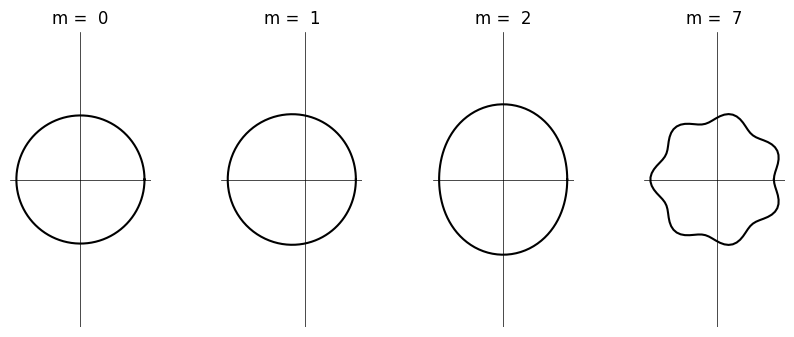

In [55]:
plt.figure()
plt.subplots(figsize=(10,5))

count = 1
for i in [0, 1, 2, 7]:
    
    if i==1:
        e = 0.2
    else:
        e = 0.08
        
    plt.subplot(1,4,count)
    plt.plot(StreamLine(i, e)[0], StreamLine(i, e)[1], color = 'black')
    
    plt.axhline(y = 0, color = 'black', linewidth = 0.5)
    plt.axvline(x = 0, color = 'black',  linewidth = 0.5)

    plt.subplots_adjust(top = 0.7, wspace = 0.5)
    plt.title("m =  {}".format(i))
    plt.axis('equal')
    plt.axis('off')
    
    count += 1
    
warnings.filterwarnings("ignore",category=matplotlib.cbook.MatplotlibDeprecationWarning)

In [56]:
def radout(a, amp, n, theta):
    return a - amp * np.sin(theta * n)

In [57]:
def radin(a, amp, n, theta):
    return a + amp * np.sin(theta * n)

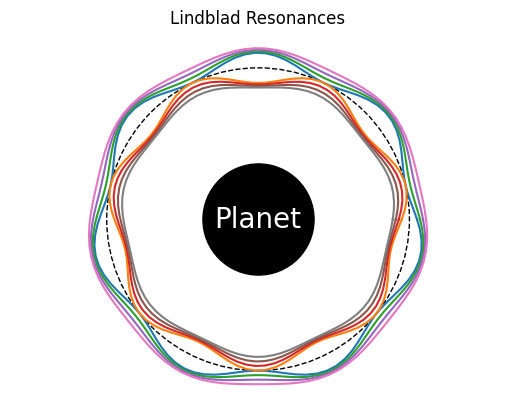

In [111]:
outerc = []
innerc = []

for i in range(4):
    theta = np.linspace(0, 2*np.pi, 100)
    outer_x = radout(1.05 + 0.02*i, 0.05 - 0.01*i, 7, theta) * np.cos(theta)
    outer_y = radout(1.05 + 0.02*i, 0.05 - 0.01*i, 7, theta) * np.sin(theta)
    inner_x = radin(0.95 - 0.02*i, 0.05 - 0.01*i, 7, theta) * np.cos(theta)
    inner_y = radin(0.95 - 0.02*i, 0.05 - 0.01*i, 7, theta) * np.sin(theta)
    outerc.append((outer_x, outer_y))
    innerc.append((inner_x, inner_y))

fig, ax = plt.subplots()
ax.set_aspect('equal')

for i in range(4):
    plt.plot(outerc[i][0], outerc[i][1])
    plt.plot(innerc[i][0], innerc[i][1])
    

ax.add_patch(plt.Circle((0, 0), 1, linestyle='dashed', edgecolor='black', facecolor='none'))
ax.plot(0,0, 'o', color = 'black', markersize = 80)
ax.text(0, 0, "Planet", fontsize=20, color='white', ha='center', va='center')

plt.title('Lindblad Resonances')
plt.axis('equal')
plt.axis('off')

plt.show()

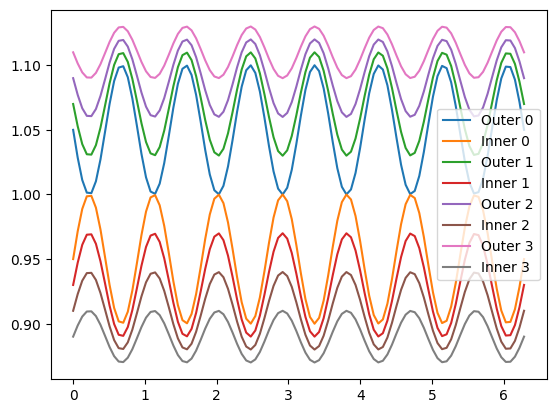

In [59]:
outer = []
inner = []

for i in range(0,4):
    theta = np.linspace(0, 2 * np.pi, 100)
    outer.append(radout(1.05 + 0.02*i, 0.05 - 0.01*i, 7, theta))
    inner.append(radin(0.95 - 0.02*i, 0.05 - 0.01*i, 7, theta))

for i in range(0,4):
    plt.plot(theta, outer[i], label=f"Outer {i}")
    plt.plot(theta, inner[i], label=f"Inner {i}")

plt.legend()
plt.show()

<h2>  Section 10.4: Density Waves and Bending Waves </h2> 

In [78]:
def r(a, e, pi, f):
    return a * (1 - e**2) / (1 + e * np.cos(f + pi))

In [79]:
def ksolve(ma, e):
    def f(ea, ma):
        return ea - e*np.sin(ea) - ma 
    ea_guess = ma
    ea_sol = fsolve(f, ea_guess, args=(ma,))
    return ea_sol[0]

In [80]:
def position(ma, a, e, pi):
    ea = ksolve(ma, e)
    x = a*(np.cos(ea)-e)
    y = a*np.sqrt(1-e**2)*np.sin(ea)
    rotation_matrix = np.array([[np.cos(pi), np.sin(pi)], [-np.sin(pi), np.cos(pi)]])
    return rotation_matrix.dot([x, y])

In [81]:
p = 1/2
e = 0.1

In [96]:
plot = {}
for i in range(11):
    pi = -i * np.pi / 12
    a = 1.0 + i * 0.15
    rotlist = []
    for t in np.arange(0, 5*np.pi, np.pi / 20):
        posvec = position(t, a, e, pi)
        f = np.arctan2(posvec[1], posvec[0])
        rad = np.sqrt(posvec[0]**2 + posvec[1]**2)
        theta = p*t
        psi = theta - f
        blip = [rad * np.cos(psi), rad * np.sin(psi)]
        rotlist.append(blip)
    plot[i] = rotlist

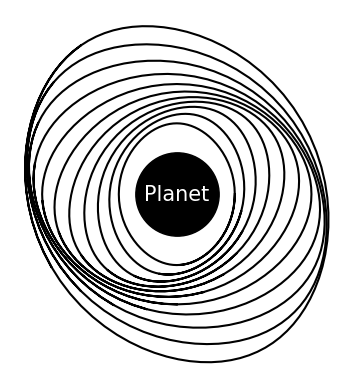

In [115]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

for i in range(11):
    ax.plot(*zip(*plot[i]), '-', color='black')

ax.plot(0,0, 'o', color = 'black', markersize = 60)
ax.text(0, 0, "Planet", fontsize=15, color='white', ha='center', va='center')

ax.set_axis_off()

plt.show()


<p> 

The creation of a spiral-density wave begins when a two-armed spiral wave is excited at the 2:1 resonance with the exterior moon. The ovals represent particle paths as seen in the frame rotating with the orbiting satellite. Their long axes become less and less well aligned with the satellite’s direction at greater distances from the resonances. The clustering that occurs in the orbital paths induces coherent oscillations in neighboring particles as they drift past by Keplerian shear.

</p> 

## Section 10.5: Narrow Rings and Sharp Edges

### Section 10.5.1: Spreading Timescales

# References


Burns, J. A., Schaffer, L. E., Greenberg, R. J., and Showalter, M. (1985). Lorentz resonances and the structure of the jovian ring, *Nature* 316, 115–119.  

Tiscareno, M. S. (2018). Planetary Ring Systems: Properties, Structure, and Evolution. *Cambridge University Press*.
